In [2]:
import pandas as pd


drug_df = pd.read_csv("Data/drug200.csv")   # Load the dataset
drug_df = drug_df.sample(frac=1)# Shuffle the data
drug_df.head(3)# Display first 3 rows

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
129,32,F,NORMAL,HIGH,7.477,drugX
85,59,M,HIGH,HIGH,13.935,drugB
146,37,F,LOW,NORMAL,12.006,drugX


In [3]:
from sklearn.model_selection import train_test_split

X = drug_df.drop("Drug", axis=1).values
y = drug_df.Drug.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=125)

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler


cat_col = [1,2,3] # Categorical columns
num_col = [0, 4] #numerical columns

transform = ColumnTransformer(
    [
        ("encoder", OrdinalEncoder(), cat_col),
        ("num_imputer", SimpleImputer(strategy="median"), num_col),
        ("num_scaler", StandardScaler(), num_col)
    ]
)

pipe = Pipeline(
    steps = [
        ("preprocessing", transform),
        ("model", RandomForestClassifier(n_estimators=100, random_state=125))
    ]
)

pipe.fit(X_train, y_train)



,steps,"[('preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('encoder', ...), ('num_imputer', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [9]:
from sklearn.metrics import accuracy_score, f1_score

predictions = pipe.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average="macro")

print(f"Accuracy: {accuracy:.2f}%, F1: {f1:.2f}")



Accuracy: 0.97%, F1: 0.93


In [10]:
with open("Results/metrics.txt", "w") as outfile:
    outfile.write(f"\nAccuracy = {accuracy:.2f}, F1 Score = {f1:.2f}.")

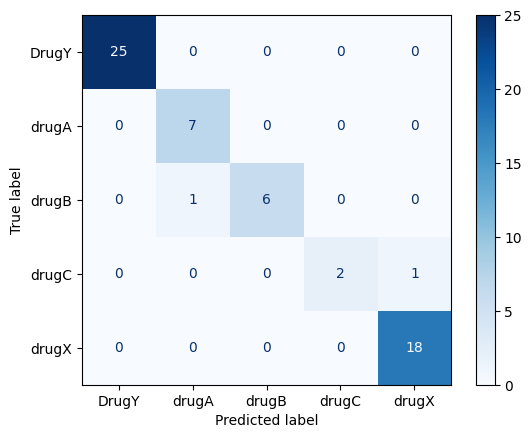

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, predictions, labels=pipe.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.savefig("Results/model_results.png", dpi=120)




In [14]:
import skops.io as sio

sio.dump(pipe,"Model/drug_pipeline.skops")

In [24]:
filename = "Model/drug_pipeline.skops"

untrusted_types = sio.get_untrusted_types(file=filename)
print("Untrusted types:", untrusted_types)

sio.load(filename, trusted = untrusted_types)

Untrusted types: ['numpy.dtype']


,steps,"[('preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('encoder', ...), ('num_imputer', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
